# Introduction
This notebook is used to create a figure on RBP2b nucleotide diversity and Tajima's D for Wai-Hong Tham at WEHI, for a manuscript under preparation.

# Setup

In [1]:
import numpy as np
import os
import allel
import vcf

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
sns.set_style('ticks')
rcParams = plt.rcParams
rcParams['font.size'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['patch.linewidth'] = .5
rcParams['font.family'] = 'arial'
rcParams['ytick.direction'] = 'out'
rcParams['xtick.direction'] = 'out'
rcParams['savefig.jpeg_quality'] = 100
rcParams['savefig.dpi'] = 80
rcParams['legend.frameon'] = True
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


In [2]:
output_dir = '20170803_RBP2b_diversity_for_Wai-Hong'
!mkdir -p {output_dir}

manuscript_vcf_ftp = 'ftp://ngs.sanger.ac.uk/production/malaria/pvgv/May2016_release/pv_1_0_NG_manuscript.vcf.gz'
manuscript_vcf = "%s/%s" % (output_dir, os.path.basename(manuscript_vcf_ftp))
rbp2b_vcf = "%s/PvRBP2b.vcf.gz" % output_dir
diploid_vcf = "%s/PvRBP2b.diploid.vcf.gz" % output_dir

In [3]:
# These are the positions (in bp) of the two exons of RBP2b, using Sal1 coordinates
RBP2b_exons = [[54438, 54492], [54781, 63146]]
    
# The following are the 148 samples used for most analyses in the PvGv manuscript (http://www.nature.com/ng/journal/v48/n8/full/ng.3599.html)
analysis_samples = np.array(
    [
        'PD0165-C', 'PD0166-C', 'PD0167-C', 'PD0168-C', 'PD0169-C', 'PD0170-C', 'PD0171-C', 'PD0172-C',
        'PD0173-C', 'PD0174-C', 'PD0175-C', 'PD0176-C', 'PD0177-C', 'PD0178-C', 'PD0179-C', 'PD0180-C',
        'PD0181-C', 'PD0182-C', 'PD0183-C', 'PD0184-C', 'PD0593-C', 'PD0594-C', 'PD0595-C', 'PD0596-C',
        'PD0597-C', 'PD0598-C', 'PD0599-C', 'PD0600-C', 'PD0601-C', 'PD0602-C', 'PD0603-C', 'PD0604-C',
        'PD0605-C', 'PD0606-C', 'PD0607-C', 'PD0608-C', 'PD0609-C', 'PD0610-C', 'PD0611-C', 'PD0612-C',
        'PD0613-C', 'PD0614-C', 'PD0615-C', 'PD0617-C', 'PD0618-C', 'PD0619-C', 'PD0620-C', 'PD0624-C',
        'PD0625-C', 'PD0674-C', 'PD0675-C', 'PD0676-C', 'PD0678-C', 'PD0679-C', 'PD0680-C', 'PD0681-C',
        'PD0684-C', 'PD0685-C', 'PD0686-C', 'PD0687-C', 'PD0688-C', 'PD0689-C', 'PD0690-C', 'PD0691-C',
        'PD0692-C', 'PD0693-C', 'PD0694-C', 'PD0695-C', 'PD0696-C', 'PD0697-C', 'PD0698-C', 'PD0699-C',
        'PD0700-C', 'PD0701-C', 'PD0702-C', 'PD0703-C', 'PD0704-C', 'PD0705-C', 'PD0706-C', 'PD0707-C',
        'PD0708-C', 'PD0709-C', 'PD0710-C', 'PD0711-C', 'PD0712-C', 'PD0713-C', 'PD0714-C', 'PD0715-C',
        'PH0177-C', 'PH0178-C', 'PH0180-C', 'PH0182-C', 'PH0187-C', 'PH0188-C', 'PH0190-C', 'PH0310-C',
        'PH0312-C', 'PH0320-C', 'PH0893-C', 'PH0914-Cx', 'PH1078-C', 'PH1109-C', 'PH1112-C', 'PH1113-C',
        'PH1124-C', 'PH1125-C', 'PH1133-C', 'PJ0006-CW', 'PJ0007-C', 'PJ0008-C', 'PJ0009-C', 'PJ0011-C',
        'PJ0012-Cx', 'PJ0016-C', 'PJ0018-C', 'PJ0030-C', 'PJ0032-C', 'PJ0033-C', 'PJ0035-C', 'PJ0037-C',
        'PJ0041-C', 'PJ0042-C', 'PJ0043-C', 'PJ0047-C', 'PJ0049-C', 'PJ0055-C', 'PJ0057-C', 'PJ0059-C',
        'PJ0063-C', 'PJ0065-C', 'PJ0068-C', 'PJ0069-Cx', 'PJ0071-C', 'PJ0072-C', 'PJ0074-C', 'PJ0079-C',
        'PJ0083-C', 'PJ0085-C', 'PJ0086-C', 'PJ0088-Cx', 'PJ0090-Cx', 'PJ0097-C', 'PJ0099-C', 'PJ0106-Cx',
        'PJ0117-Cx', 'PJ0123-C', 'PJ0127-Cx', 'PJ0167-C'
    ]
)
print(analysis_samples.shape)

(148,)


# Download files from MalariaGEN website

In [4]:
!wget -O {manuscript_vcf} {manuscript_vcf_ftp}

--2017-08-03 09:45:12--  ftp://ngs.sanger.ac.uk/production/malaria/pvgv/May2016_release/pv_1_0_NG_manuscript.vcf.gz
           => `/nfs/team112_internal/rp7/data/pv/analysis/20170803_RBP2b_diversity_for_Wai-Hong/pv_1_0_NG_manuscript.vcf.gz'
Resolving ngs.sanger.ac.uk (ngs.sanger.ac.uk)... 193.62.203.121
Connecting to ngs.sanger.ac.uk (ngs.sanger.ac.uk)|193.62.203.121|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /production/malaria/pvgv/May2016_release ... done.
==> SIZE pv_1_0_NG_manuscript.vcf.gz ... 276257852
==> PASV ... done.    ==> RETR pv_1_0_NG_manuscript.vcf.gz ... done.
Length: 276257852 (263M) (unauthoritative)

100%[======================================>] 276,257,852  321M/s   in 0.8s    

2017-08-03 09:45:13 (321 MB/s) - `/nfs/team112_internal/rp7/data/pv/analysis/20170803_RBP2b_diversity_for_Wai-Hong/pv_1_0_NG_manuscript.vcf.gz' saved [276257852]



In [5]:
!wget -O {manuscript_vcf + '.tbi'} {manuscript_vcf_ftp + '.tbi'}

--2017-08-03 09:45:14--  ftp://ngs.sanger.ac.uk/production/malaria/pvgv/May2016_release/pv_1_0_NG_manuscript.vcf.gz.tbi
           => `/nfs/team112_internal/rp7/data/pv/analysis/20170803_RBP2b_diversity_for_Wai-Hong/pv_1_0_NG_manuscript.vcf.gz.tbi'
Resolving ngs.sanger.ac.uk (ngs.sanger.ac.uk)... 193.62.203.121
Connecting to ngs.sanger.ac.uk (ngs.sanger.ac.uk)|193.62.203.121|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /production/malaria/pvgv/May2016_release ... done.
==> SIZE pv_1_0_NG_manuscript.vcf.gz.tbi ... 15050
==> PASV ... done.    ==> RETR pv_1_0_NG_manuscript.vcf.gz.tbi ... done.
Length: 15050 (15K) (unauthoritative)

100%[======================================>] 15,050      --.-K/s   in 0.001s  

2017-08-03 09:45:14 (24.9 MB/s) - `/nfs/team112_internal/rp7/data/pv/analysis/20170803_RBP2b_diversity_for_Wai-Hong/pv_1_0_NG_manuscript.vcf.gz.tbi' saved [15050]



# Create VCF for RBP2b

In [6]:
!bcftools view --regions Pv_Sal1_chr08:54438-54492,Pv_Sal1_chr08:54781-63146 --output-file {rbp2b_vcf} --output-type z {manuscript_vcf}
!bcftools index -f --tbi {rbp2b_vcf}

In [7]:
# Create truly diploid version of vcf
!zcat {rbp2b_vcf} | \
sed 's/\t0:/\t0\/0:/g' | \
sed 's/\t1:/\t1\/1:/g' | \
bgzip -c > \
{diploid_vcf}
!bcftools index -f --tbi {diploid_vcf}


# Read VCF data into numpy arrays

In [8]:
vcf_data = allel.read_vcf(diploid_vcf)

In [9]:
vcf_samples_in_148 = np.in1d(vcf_data['samples'], analysis_samples)
np.unique(vcf_samples_in_148, return_counts=True)

(array([False,  True], dtype=bool), array([ 80, 148]))

In [10]:
# How many variants and samples, and what is ploidy?
vcf_data['calldata/GT'].shape

(159, 228, 2)

# Convert genomic coordinate to position within gene

In [11]:
def position_in_gene(pos=59000, exons=RBP2b_exons):
    offset = 0
    for exon in exons:
        if pos >= exon[0] and pos <= exon[1]:
            return(pos-exon[0]+offset+1)
        else:
            offset += (exon[1] - exon[0] + 1)
    return(np.nan)
print(position_in_gene())
print(position_in_gene(54438))
print(position_in_gene(54492))
print(position_in_gene(54493))
print(position_in_gene(54781))
print(position_in_gene(63146))


4275
1
55
nan
56
8421


# Plotting functions

In [12]:
def plot_tajd(vcf_data=vcf_data, samples_to_use=vcf_samples_in_148,
              size=300, start=54438, stop=63146 , step=3, despine_bottom=False,
              highlight_regions=[[169, 470]], ax=None):
    pos_in_gene = [position_in_gene(x) for x in vcf_data['variants/POS']]
    ac = allel.GenotypeArray(vcf_data['calldata/GT'][: ,samples_to_use, :]).count_alleles()
    D, windows, counts = allel.stats.diversity.windowed_tajima_d(
        pos=pos_in_gene, ac=ac, size=size, start=position_in_gene(start), stop=position_in_gene(stop), step=step,
        fill=0.0
    )
    D[np.isnan(D)] = 0.0
    
    # set up axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 2))
#         fig.tight_layout()
    
    x = (windows[:, 0] + windows[:, 1]) / 6
    
    # plot
    sns.despine(ax=ax, offset=5, bottom=despine_bottom)
    ax.plot(x, D)
    if despine_bottom:
        ax.set_xlabel('')        
        ax.set_xticks([])        
    else:
        ax.set_xlabel('PvRBP2b amino acid position')
    ax.set_xlim((position_in_gene(start)/3, position_in_gene(stop)/3))
    for region in highlight_regions:
        ax.axvspan(region[1], region[0], facecolor='k', alpha=0.1)
    ax.axhline(0)
    ax.set_ylabel('Tajima\'s $D$')
    
    minorLocator = MultipleLocator(100)
    ax.xaxis.set_minor_locator(minorLocator)

    return(ax, x, D)


/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/allel/stats/diversity.py:1040: RuntimeWarning: invalid value encountered in double_scalars
  wD = d / d_stdev
/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


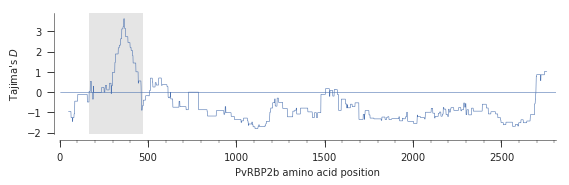

In [13]:
ax, x, D = plot_tajd()

In [14]:
def plot_diversity(vcf_data=vcf_data, samples_to_use=vcf_samples_in_148,
              size=300, start=54438, stop=63146 , step=3, despine_bottom=False,
              highlight_regions=[[169, 470]], ax=None):
    pos_in_gene = [position_in_gene(x) for x in vcf_data['variants/POS']]
    ac = allel.GenotypeArray(vcf_data['calldata/GT'][: ,samples_to_use, :]).count_alleles()
    pi, windows, number_of_bases, counts = allel.stats.diversity.windowed_diversity(
        pos=pos_in_gene, ac=ac, size=size, start=position_in_gene(start), stop=position_in_gene(stop), step=step,
        fill=0.0
    )
    pi[np.isnan(pi)] = 0.0
    
    # set up axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 2))
#         fig.tight_layout()
    
    x = (windows[:, 0] + windows[:, 1]) / 6
    
    # plot
    sns.despine(ax=ax, offset=5, bottom=despine_bottom)
    ax.plot(x, pi)
    if despine_bottom:
        ax.set_xlabel('')        
        ax.set_xticks([])        
    else:
        ax.set_xlabel('PvRBP2b amino acid position')
    ax.set_xlim((position_in_gene(start)/3, position_in_gene(stop)/3))
    for region in highlight_regions:
        ax.axvspan(region[1], region[0], facecolor='k', alpha=0.1)
    ax.set_ylabel('Nucleotide diversity (${\pi}$)')
    
    return(ax, x, pi)


/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


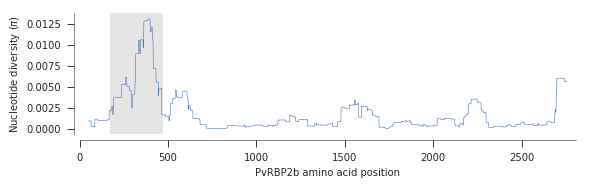

In [15]:
_ = plot_diversity()

In [16]:
def plot_pi_d(vcf_data=vcf_data, samples_to_use=vcf_samples_in_148,
              size=300, start=54438, stop=63146 , step=3, ax=None, filename=None):
    fig, ax = plt.subplots(2, figsize=(8, 4))
    
    _, x, pi = plot_diversity(vcf_data, samples_to_use, size, start, stop , step, despine_bottom=True, ax=ax[0])
    _, x, D = plot_tajd(vcf_data, samples_to_use, size, start, stop , step, despine_bottom=False, ax=ax[1])
    
    fig.tight_layout()
    
    if filename is not None:
        fig.savefig(filename)


# Create final plot

/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/allel/stats/diversity.py:1040: RuntimeWarning: invalid value encountered in double_scalars
  wD = d / d_stdev
/nfs/users/nfs_r/rp7/miniconda3/envs/biipy/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


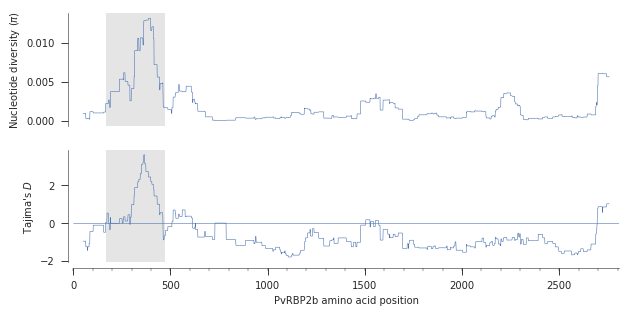

In [17]:
plot_pi_d(filename="%s/PvRBP2b_Pi_D_all_SNPs_20170803.pdf" % output_dir)